In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
with open("icecube_10year_ps/irfs/IC59_effectiveArea.csv", 'r') as f2:
    lines = f2.readlines()
content=[]
column=lines[0].split()
column.pop(0)
for line in lines[1:]:
    
    content.append(line.split())
data = pd.DataFrame(content, columns = column)

#data = pd.DataFrame(content).drop(0)
data
#ASSUMING number of particles = flux * effective area

,log10(E_nu/GeV)_min,log10(E_nu/GeV)_max,Dec_nu_min[deg],Dec_nu_max[deg],A_Eff[cm^2]
0,2.00,2.20,-90.00,-73.74,0.00
1,2.20,2.40,-90.00,-73.74,0.00
2,2.40,2.60,-90.00,-73.74,0.00
3,2.60,2.80,-90.00,-73.74,0.00
4,2.80,3.00,-90.00,-73.74,0.00
...,...,...,...,...,...
1995,9.00,9.20,73.74,90.00,0.00
1996,9.20,9.40,73.74,90.00,0.00
1997,9.40,9.60,73.74,90.00,0.00
1998,9.60,9.80,73.74,90.00,0.00


In [2]:
de = [pow(10,float(data['log10(E_nu/GeV)_max'][i])) - pow(10,float((data['log10(E_nu/GeV)_min'][i]))) for i in range(0,len(data['log10(E_nu/GeV)_max']))]
dphi = [float(data['Dec_nu_max[deg]'][i]) - float((data['Dec_nu_min[deg]'][i])) for i in range(0,len(data['Dec_nu_max[deg]']))]
#print(de)
#print(de)
eff_a = [float(data['A_Eff[cm^2]'][i]) for i in range(0,len(data['A_Eff[cm^2]']))]
e = [((pow(10,float(data['log10(E_nu/GeV)_max'][i])) + pow(10,float((data['log10(E_nu/GeV)_min'][i]))))/2.0) for i in range(0,len(data['log10(E_nu/GeV)_max']))]
e2 = [pow((pow(10,float(data['log10(E_nu/GeV)_max'][i])) + pow(10,float((data['log10(E_nu/GeV)_min'][i]))))/2.0,2) for i in range(0,len(data['log10(E_nu/GeV)_max']))]
#flux = [e2[i] * dphi[i]/de[i] for i in range(0,len(data['log10(E_nu/GeV)_max']))]


In [3]:
dloge = [float(data['log10(E_nu/GeV)_max'][i]) -float((data['log10(E_nu/GeV)_min'][i])) for i in range(0,len(data['log10(E_nu/GeV)_max']))]
yax = [eff_a[i] * e[i]* dphi[i]/dloge[i] for i in range(0, len(dloge))]
n_e = [e[i]*(dphi[i]/dloge[i]) for i in range(0,len(data['log10(E_nu/GeV)_max']))]
#yax[7] == 

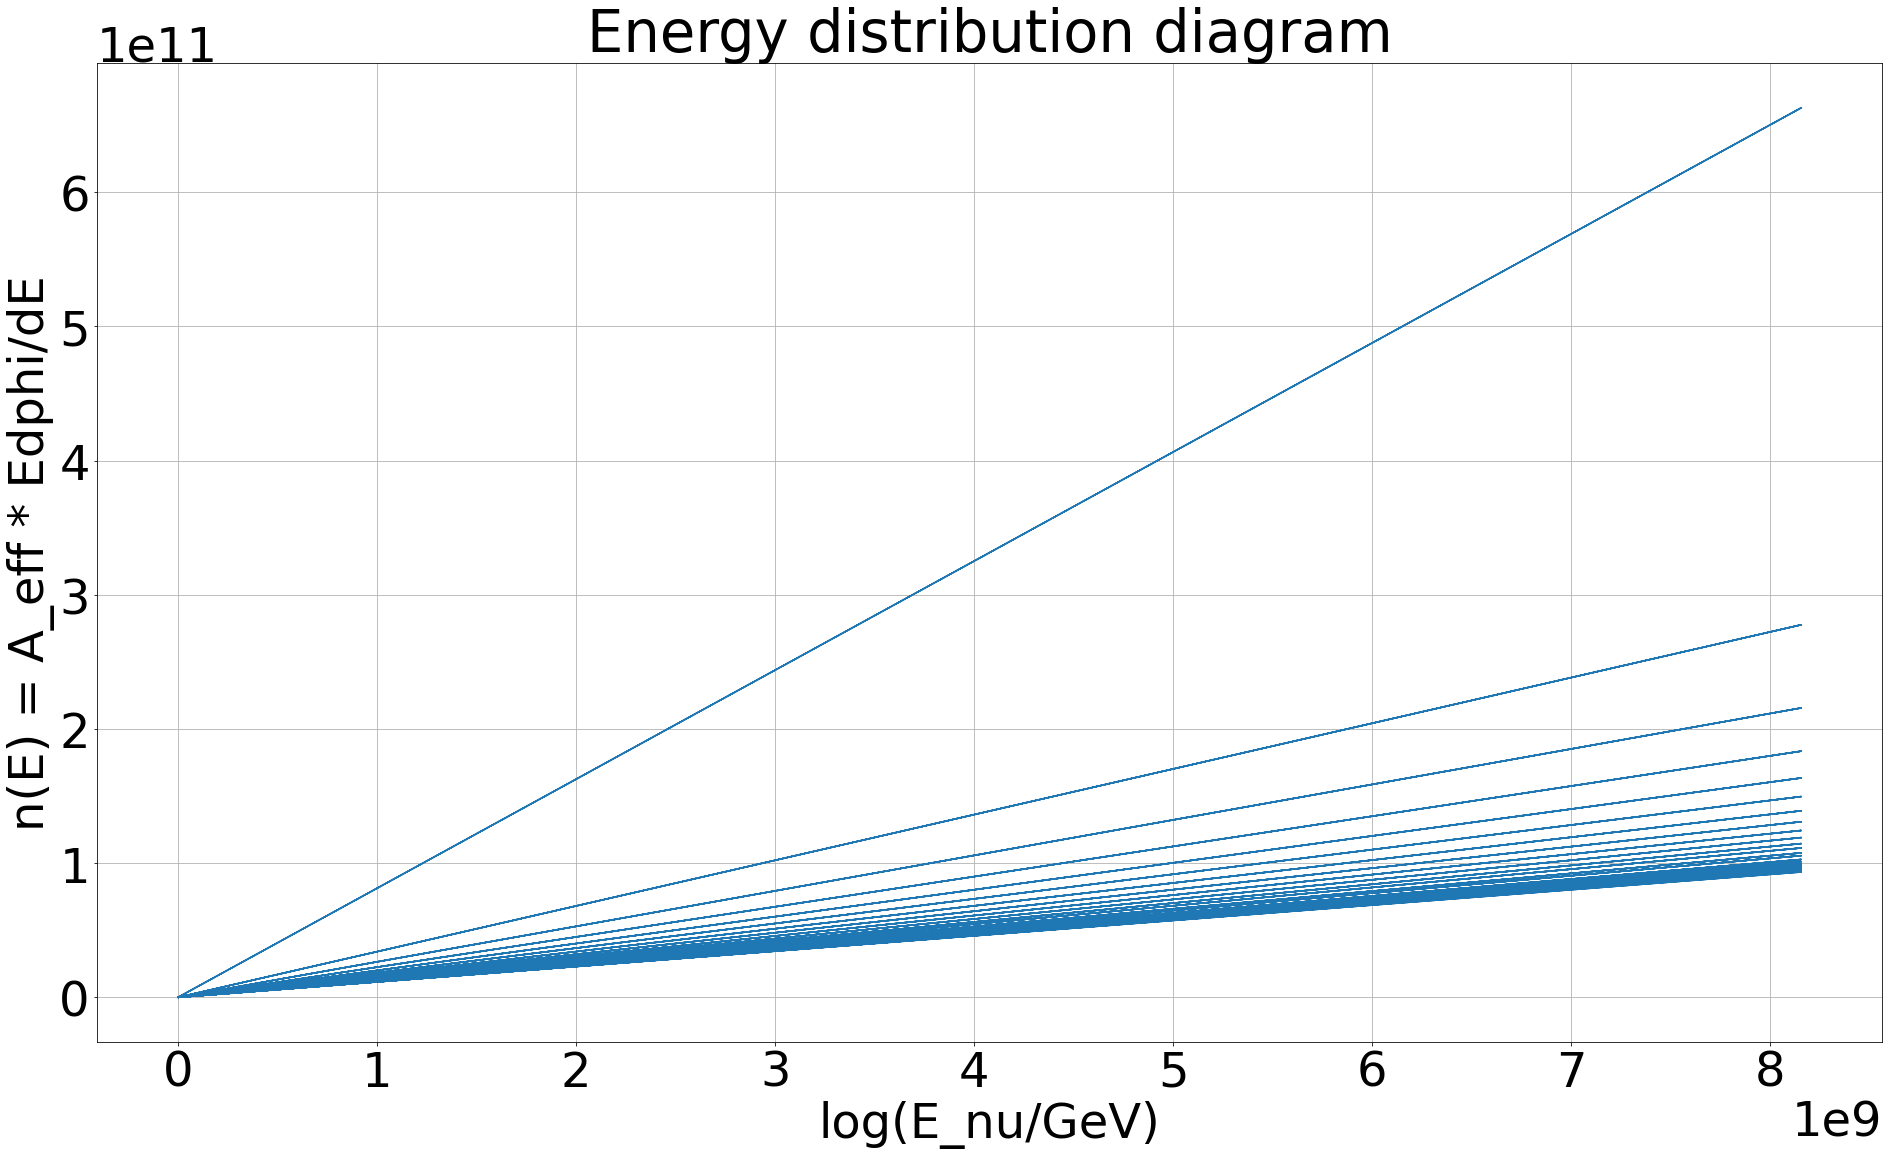

In [4]:
plt.figure(figsize=(32,18))
plt.rcParams.update({'font.size': 48})
plt.xlabel("log(E_nu/GeV)")
plt.ylabel("n(E) = A_eff * Edphi/dE")
plt.title("Energy distribution diagram")
plt.plot(e,n_e)
#plt.suptitle(filenamewithpath.replace('icecube_10year_ps/irfs/',''))
plt.grid(True, which='both')
plt.show()
#plt.savefig('test.jpg')

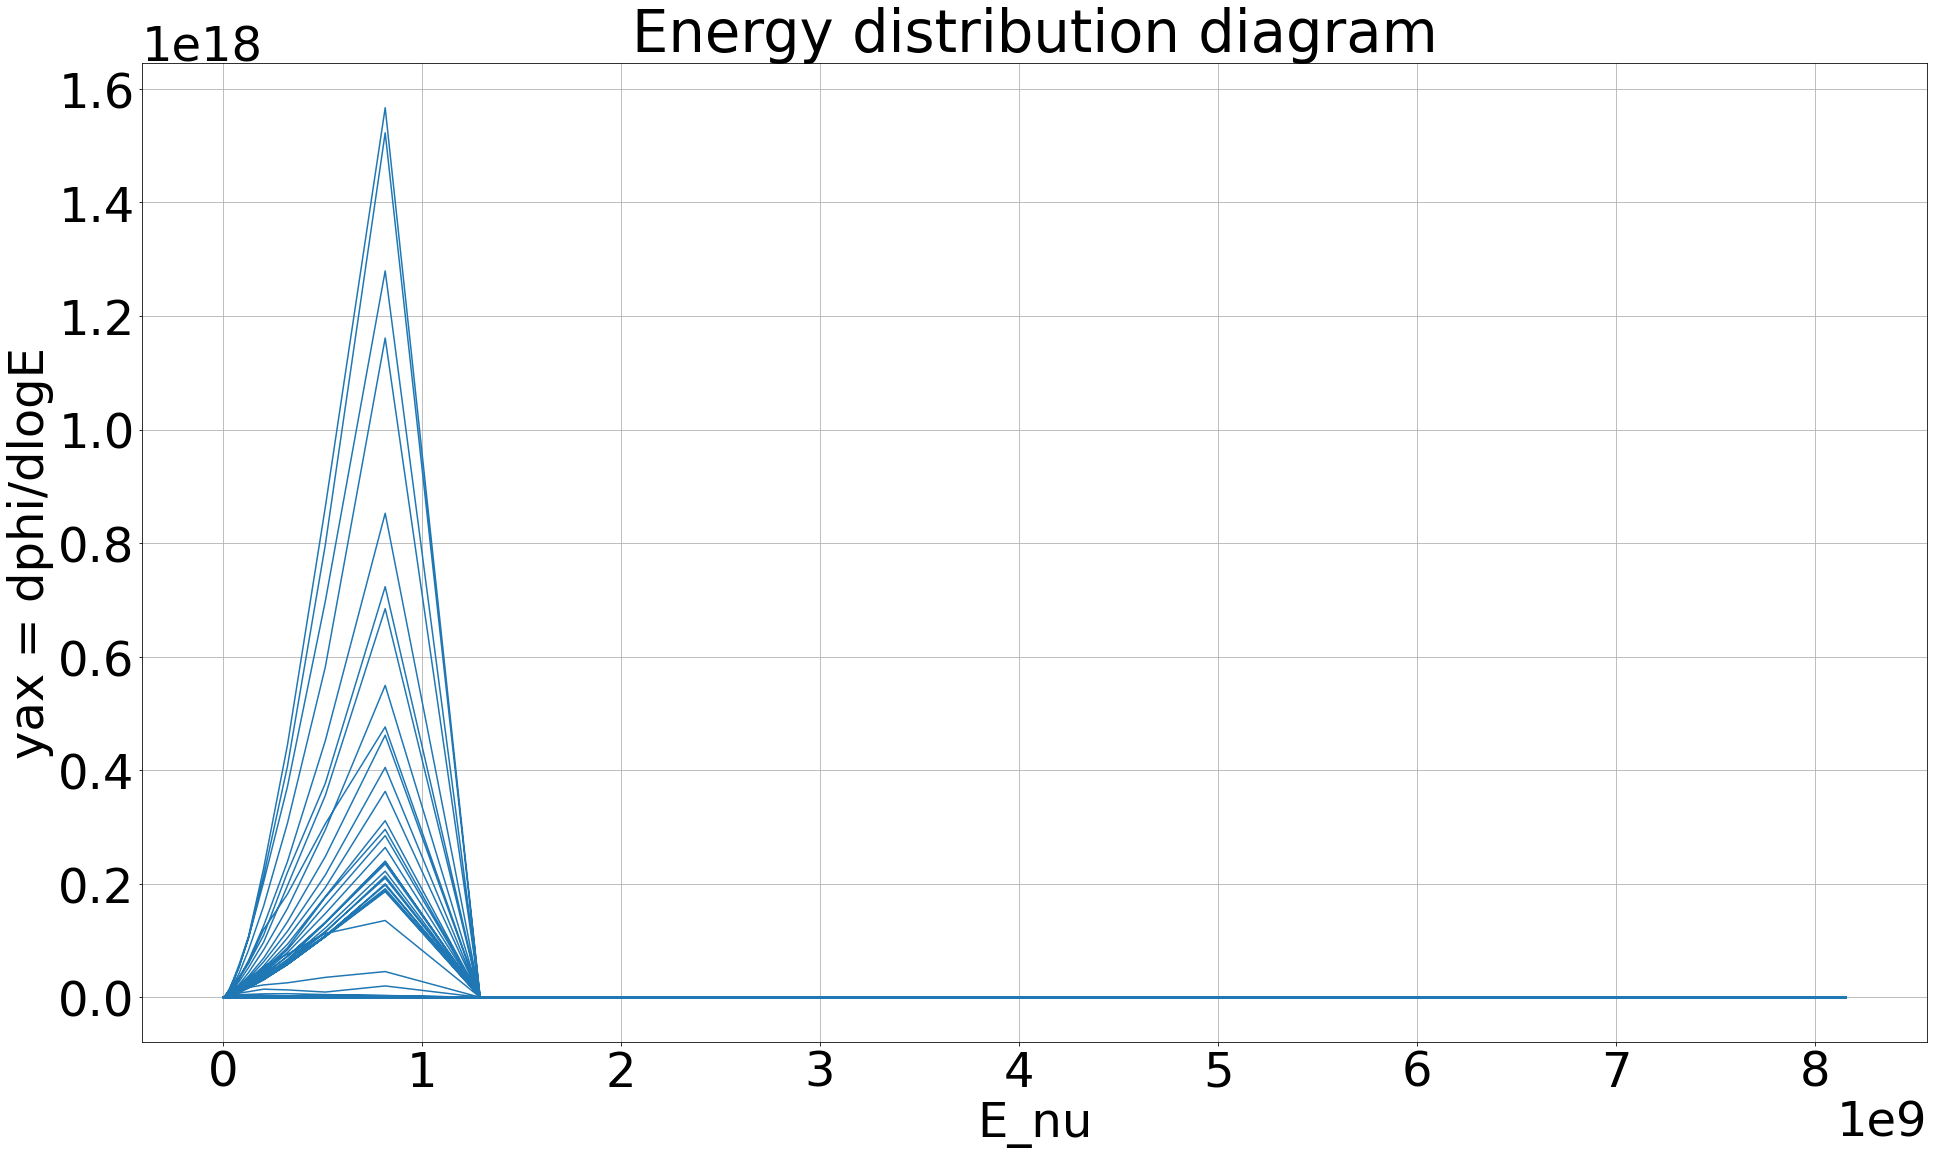

In [5]:
plt.figure(figsize=(32,18))
plt.rcParams.update({'font.size': 48})
plt.xlabel("E_nu")
plt.ylabel("yax = dphi/dlogE")
plt.title("Energy distribution diagram")
plt.plot(e,yax)
#plt.suptitle(filenamewithpath.replace('icecube_10year_ps/irfs/',''))
plt.grid(True, which='both')
plt.show()

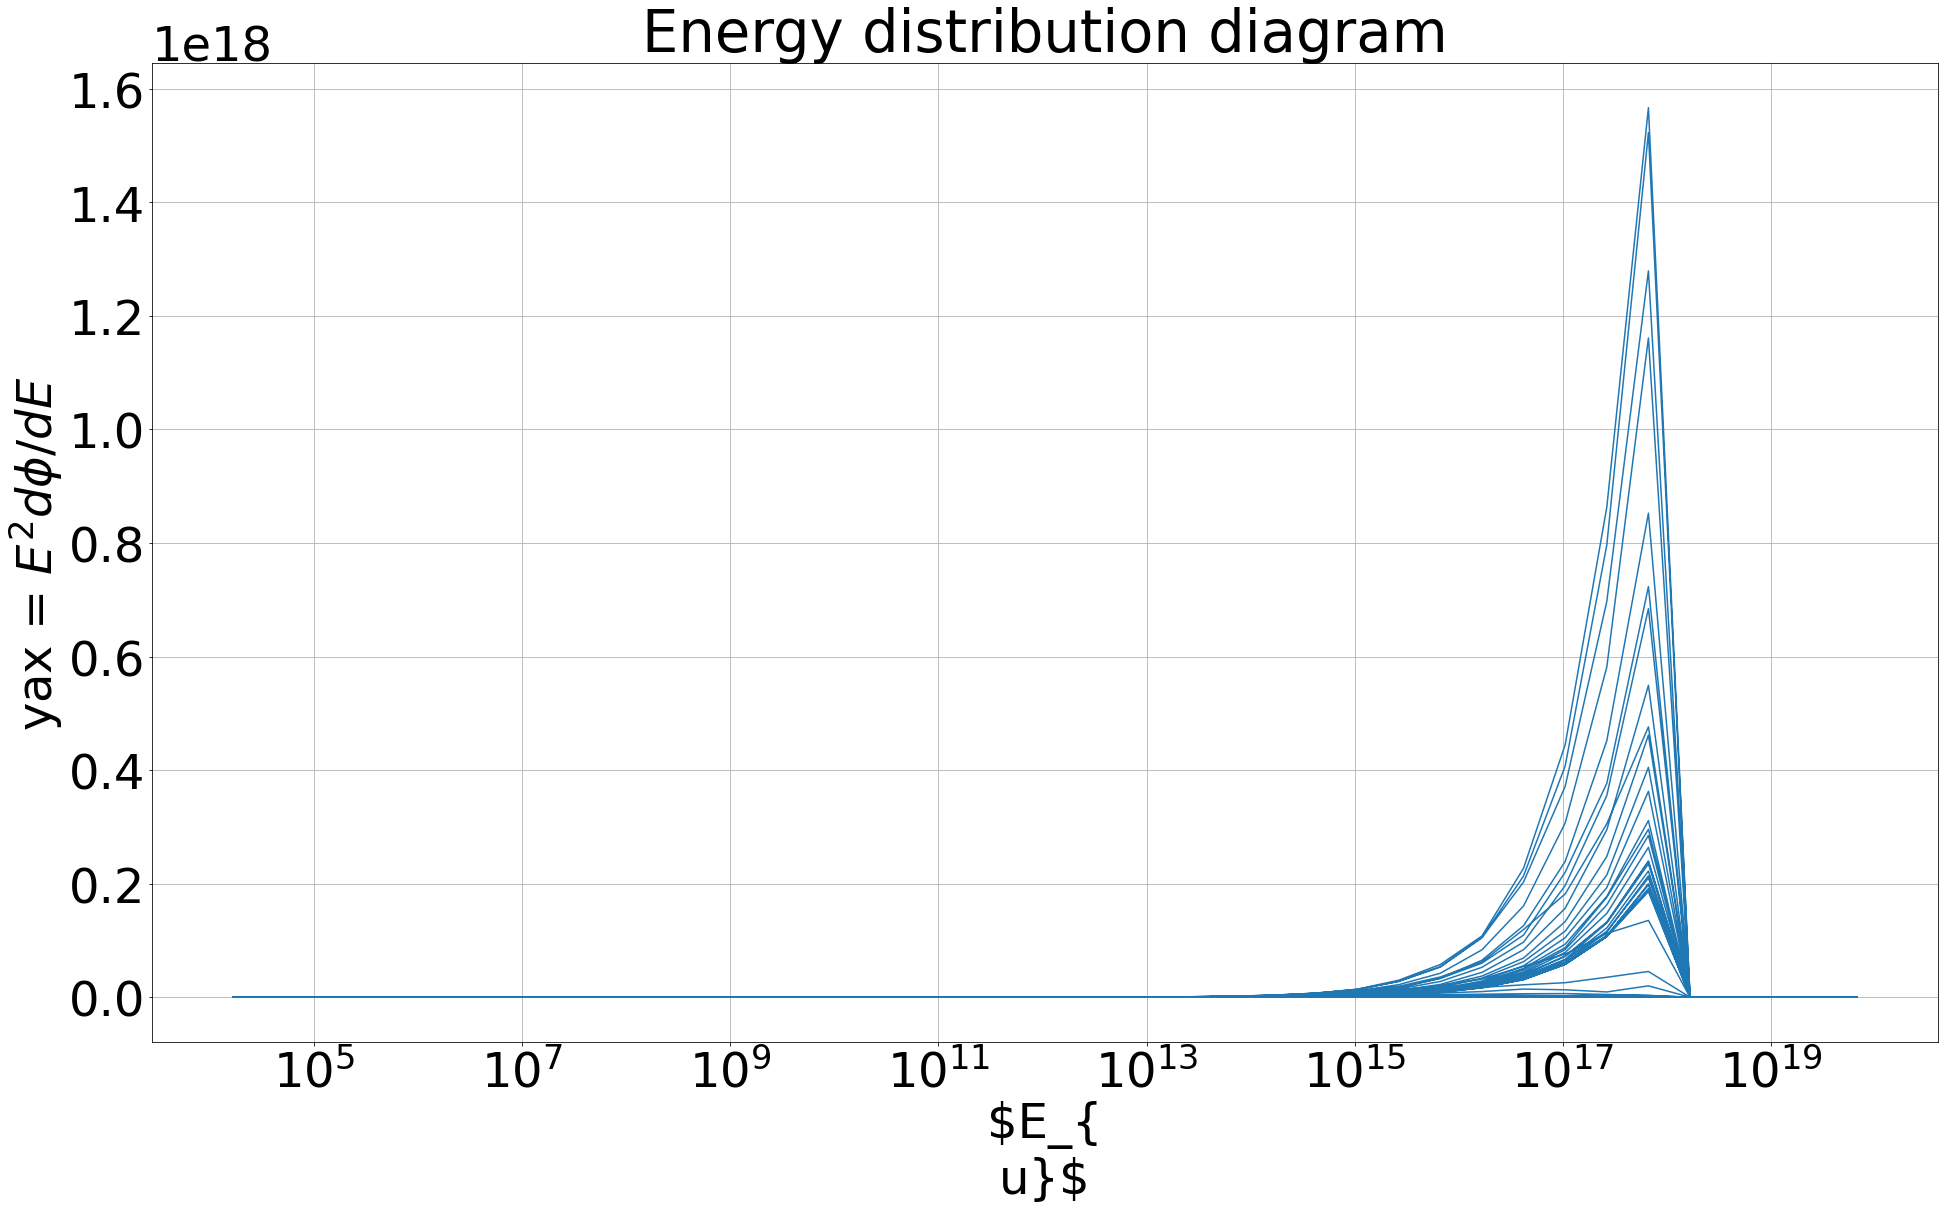

In [14]:
plt.figure(figsize=(32,18))
plt.rcParams.update({'font.size': 48})
plt.xscale('log')
plt.xlabel("$E_{\nu}$")
plt.ylabel("yax = $E^2d{\phi}/dE$")
plt.title("Energy distribution diagram")
plt.plot(e2,yax)
#plt.suptitle(filenamewithpath.replace('icecube_10year_ps/irfs/',''))
plt.grid(True, which='both')
plt.show()

In [15]:
len(yax)

2000